---

# Datos y Modelos


In [38]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('talk')
#context: dict, or one of {paper, notebook, talk, poster}
#A dictionary of parameters or the name of a preconfigured set.
# define el estilo de visualizacion de las figuras

## Carga del DataSet
El dataset con el que estamos trabajando esta alojado en [esta pagina](https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-sueldos-2022-1/).

El url del .csv que contiene los resultados de la encuesta es:
url = https://sysar.my/sueldos20221arg

In [39]:
df = pd.read_csv('renamed_2022.1 - sysarmy - Encuesta de remuneración salarial Argentina - Argentina.csv')
df.head(3)

,work_province,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,...,work_listen_more_men,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,work_lastyear_discrimination,¿Salir o seguir contestando?.3,company_days_in_the_office,company_pandemic_support,company_new_benefits,profile_age,profile_gender
0,Catamarca,Tercerizado (trabajo a través de consultora o ...,207000,150000.0,NaN,NaN,2,1,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,Varón Cis
1,Catamarca,Full-Time,130000,99000.0,NaN,NaN,3,4,Un sueldo,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
2,Catamarca,Full-Time,185000,145000.0,Mi sueldo está dolarizado (pero cobro en moned...,100,2,2,De uno a tres sueldos,Performance grupal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Varón Trans


In [40]:
df.dtypes[:4]
# notar que la columna salary_monthly_BRUTO contiene datos del tipo obect(str en este caso).
# para poder analizar esos datos en forma numerica vamos a tener que pasarlos a un valor numerico.

work_province            object
work_contract_type       object
salary_monthly_BRUTO     object
salary_monthly_NETO     float64
dtype: object

In [41]:
# vamos a crear una nueva columna que tenga los datos de salary_monthly_BRUTO en float y 
# que no tenga nada si no puede convertirlo

df['salary_monthly_BRUTO'] = pd.to_numeric(df['salary_monthly_BRUTO'],
                                           errors='coerce')


# errors: {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# If ‘raise’, then invalid parsing will raise an exception.
# If ‘coerce’, then invalid parsing will be set as NaN.
# If ‘ignore’, then invalid parsing will return the input.



In [42]:
# despues del boque anterior tienen que haber quedado algunas celdas con NaN
df.salary_monthly_BRUTO.isna().sum()


# vemos que hay 100 celdas que tienen NaN. Corresponden a celdas que estaban mal entradas en la DF original y las 
# eliminamos cuando convertimos la columna de str a float

100

In [43]:
# vamos a eliminar las entradas que tienen Nan en la columna salary_monthly_BRUTO
df = df.dropna(subset=['salary_monthly_BRUTO'])
df.shape


(5754, 56)

In [44]:
df.dtypes[:4]

work_province            object
work_contract_type       object
salary_monthly_BRUTO    float64
salary_monthly_NETO     float64
dtype: object

In [45]:
salary_col='salary_monthly_BRUTO'
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5754.00
mean      260453.72
std       302083.74
min            0.00
25%       115000.00
50%       187750.00
75%       300000.00
max      8400000.00
Name: salary_monthly_BRUTO, dtype: object

In [46]:
# nota. creo que hubiera sido mas sencillo utilizar la funcion round()
df[salary_col].describe().round(2)

count       5754.00
mean      260453.72
std       302083.74
min            0.00
25%       115000.00
50%       187750.00
75%       300000.00
max      8400000.00
Name: salary_monthly_BRUTO, dtype: float64

## Medidas de tendencia central

In [47]:
# sabemos que los valores extremo tiene un impacto muy fuerte sobre el valor de la media (recordar que es un medida
# del centro de masa del histograma).
# Que pasa si vamos recortando los valores extremos?

max_salaries = [df[salary_col].max(), 10**6,500000, 400000, 300000, 200000 ]

central_tendency = [
    (max_salary, 
     df[df[salary_col] < max_salary][salary_col].mean(),
    df[df[salary_col] < max_salary][salary_col].median(),
     df[df[salary_col] < max_salary][salary_col].mean() - df[df[salary_col] < max_salary][salary_col].median()
    )
    for max_salary in max_salaries
]
central_tendency

# notar que a medida que quitamos valores extremos, la dierencia entre la media y la mediana va disminuyendo.

[(8400000.0, 259038.8888213106, 187500.0, 71538.8888213106),
 (1000000, 224516.1923084764, 180000.0, 44516.1923084764),
 (500000, 187160.72419329197, 170000.0, 17160.72419329197),
 (400000, 170631.28979296793, 162540.0, 8091.289792967931),
 (300000, 147599.98864363207, 150000.0, -2400.0113563679333),
 (200000, 112432.55131986864, 120000.0, -7567.4486801313615)]

In [48]:
central_tendency_max = [
    (max_salary, 
     df[df[salary_col] < max_salary][salary_col].mean(),
    df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in range(50000, int(df[salary_col].max()), 10**4)
]

central_tendency_max_df = pd.DataFrame(central_tendency_max,
                                      columns=['max_salary', 'mean', 'median'])\
.melt(id_vars='max_salary', var_name='metric')

central_tendency_max_df.head()

,max_salary,metric,value
0,50000,mean,11428.248917
1,60000,mean,17674.096301
2,70000,mean,27987.052631
3,80000,mean,37618.264907
4,90000,mean,46460.409872


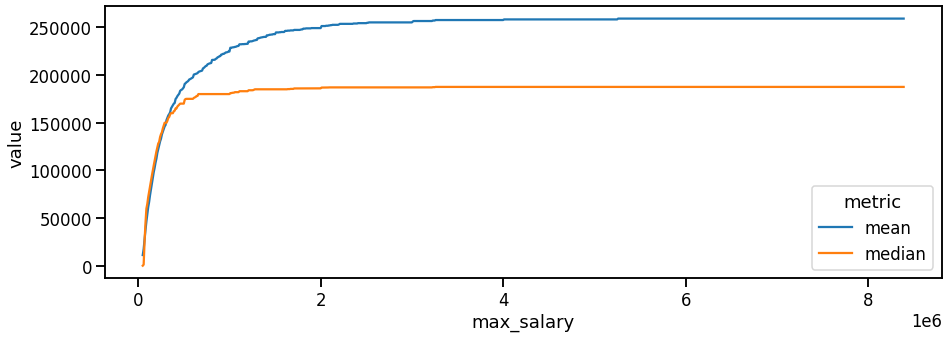

In [49]:
fig = plt.figure(figsize = (15,5))

sns.lineplot(data = central_tendency_max_df,
             x = 'max_salary',
             y = 'value',
             hue = 'metric')


plt.show()

### otra forma de visualizar la diferencia entre media y mediana

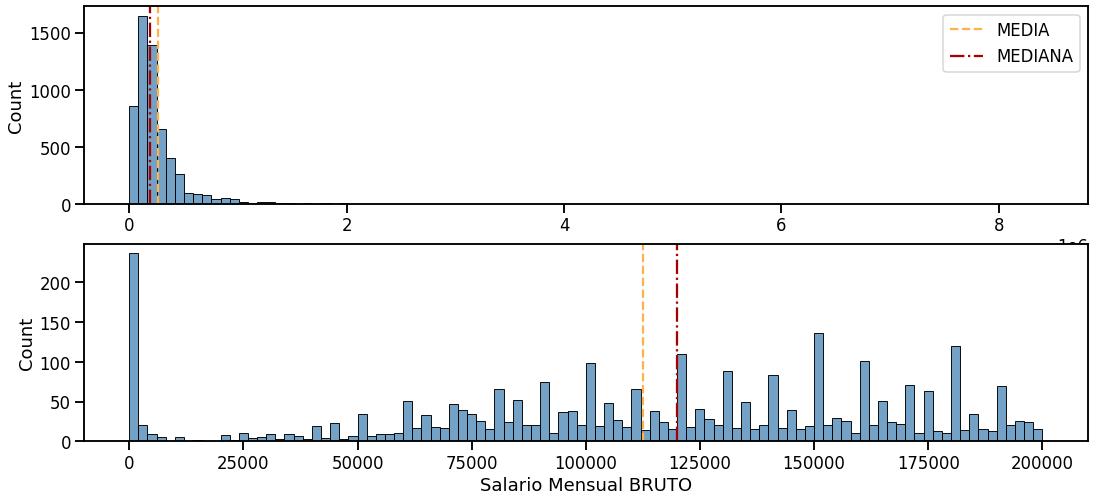

In [50]:

# creamos la figura (fig) y el epacio para los dos graficos (axes).
fig, axes = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=(18,8))
# creamos el grafico superior de la figura. Un histograma con los datos de la columna 'salary_monthly_BRUTO'
sns.histplot(data=df[salary_col],
            bins=100,
            ax=axes[0],
            color='steelblue')

# creamos una linea vertical en la posicion de la media
axes[0].axvline(x=df[salary_col].mean(),
               color = '#ffb14a',
               linestyle = '--',
               label = 'MEDIA')
# creamos una linea vertical en la posicion de la mediana
axes[0].axvline(x=df[salary_col].median(),
               color = '#a80000',
               linestyle = '-.',
               label = 'MEDIANA')
# incluimos la leyenda en el grafico de arriba
axes[0].legend()

# eliminamos el el label del eje x
axes[0].set(xlabel=None)


# en el grafico de abajo de la figura vamos a graficar un histograma de la misma columna pero eliminando 
# algunos datos extremos (los sueldos > 200000)

#genero una nueva DF que solo tenga los salarios < 200000.

filtered_df = df[df[salary_col] < 200000]

# creamos el grafico inferior de la figura. Un histograma con los datos de la columna 'salary_monthly_BRUTO' menore a 200000
sns.histplot(data=filtered_df[salary_col],
            bins=100,
            ax=axes[1],
            color='steelblue')
# creamos una linea vertical en la posicion de la media
axes[1].axvline(x=filtered_df[salary_col].mean(),
               color = '#ffb14a',
               linestyle = '--',
               label = 'MEDIA')
# creamos una linea vertical en la posicion de la mediana
axes[1].axvline(x=filtered_df[salary_col].median(),
               color = '#a80000',
               linestyle = '-.',
               label = 'MEDIANA')
axes[1].set(xlabel='Salario Mensual BRUTO')


plt.savefig('Media Vs Median.png', bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

---
## Medidas de dispersion

In [51]:
df.dtypes

work_province                                                                                          object
work_contract_type                                                                                     object
salary_monthly_BRUTO                                                                                  float64
salary_monthly_NETO                                                                                   float64
salary_in_usd                                                                                          object
salary_last_dollar_value                                                                               object
salary_satisfaction                                                                                     int64
salary_comparison_last_semester                                                                         int64
salary_has_bonus                                                                                       object
salary_bon

In [52]:
df[['salary_monthly_BRUTO','salary_monthly_NETO']].describe().round()

,salary_monthly_BRUTO,salary_monthly_NETO
count,5754.0,5514.0
mean,260454.0,203229.0
std,302084.0,269267.0
min,0.0,1.0
25%,115000.0,96000.0
50%,187750.0,150000.0
75%,300000.0,211000.0
max,8400000.0,10023000.0


In [53]:
df[['salary_monthly_BRUTO', 'salary_monthly_NETO']].describe().round()

#Notar que en este caso no puedo alicar la funcion que habia usado antes: .apply(lambda s: '{0:.2f}'.format(s))
# porque esa funcion se aplica a DF. Aunque en aque caso tambien hubieramos podido usar la funcion .round()

# notar que como era de suponerse el salario BRUTO es MAYOR que el NETO. El neto es el salario que recibe en el bolsillo el
# trabajador despues de todos los descuentos que se relizan sobre el BRUTO.

,salary_monthly_BRUTO,salary_monthly_NETO
count,5754.0,5514.0
mean,260454.0,203229.0
std,302084.0,269267.0
min,0.0,1.0
25%,115000.0,96000.0
50%,187750.0,150000.0
75%,300000.0,211000.0
max,8400000.0,10023000.0


In [54]:
df[['salary_monthly_BRUTO', 'salary_monthly_NETO']].describe().round(2).iloc[['1','2']]
# es valido comparar la desviacion de dos variables que tienen diferente media? NO
# para eso tenemos que usar el coeficiente de varacion (std dividida por la media)
# si bien es sencillo de calcular, no hay en PANDAS una funcion para calculara

,salary_monthly_BRUTO,salary_monthly_NETO
mean,260453.72,203228.82
std,302083.74,269267.21


In [55]:
# podemos usar la libreria scipy
import scipy

print(f'Coeficiente de variacion salario BRUTO:{scipy.stats.variation(df.salary_monthly_BRUTO)}')
print(f'Coeficiente de variacion salario NETO:{scipy.stats.variation(df.salary_monthly_NETO)}')

# notar que el resultado para salrio NETO dio nan, esto debe ser porque debe haber entradas que no estan completadas en la
# columna de salario NETO y esos nan se arrastran en el calculo del coeficiente de variacion.
# notar que cuando aplicmos .describe() vimos que la culomna de BRUTO tenia mas datos que la columna de NETO

Coeficiente de variacion salario BRUTO:1.1597357333012568
Coeficiente de variacion salario NETO:nan


In [56]:
df['salary_monthly_BRUTO'].isna().sum()

0

In [57]:
df['salary_monthly_NETO'].isna().sum()
# confirmamos que la columna de NETO tiene valores NaN. Vamos a tener que eliminar esas filas antes de calcular el
# coeficiente de variacion

240

In [58]:
print(f'Coeficiente de variacion salario BRUTO:{scipy.stats.variation(df.salary_monthly_BRUTO).round(2)}')
print(f'Coeficiente de variacion salario NETO:{scipy.stats.variation(df.salary_monthly_NETO.dropna()).round(2)}')

Coeficiente de variacion salario BRUTO:1.16
Coeficiente de variacion salario NETO:1.32


---
## Percentiles y Box Plots

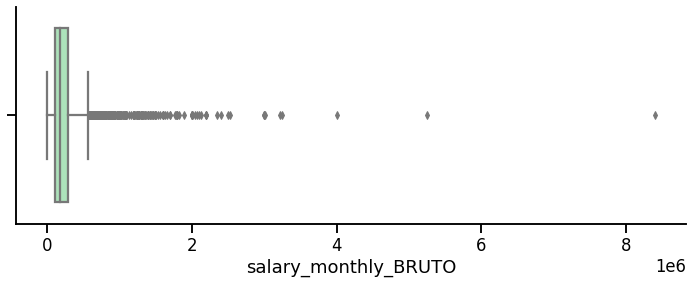

In [59]:
fig = plt.figure(figsize = (12,4))

sns.boxplot(x=df[salary_col], 
           color = '#a4ebb7')

sns.despine()

plt.show()


---
## Violin plot

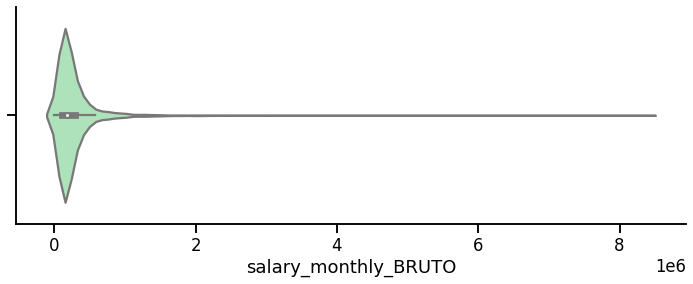

In [60]:
fig = plt.figure(figsize = (12,4))

sns.violinplot(x=df[salary_col], 
           color = '#a4ebb7')

sns.despine()

plt.show()


---
## Distplot
This function is deprecated and will be removed in a future version of seborn.

c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


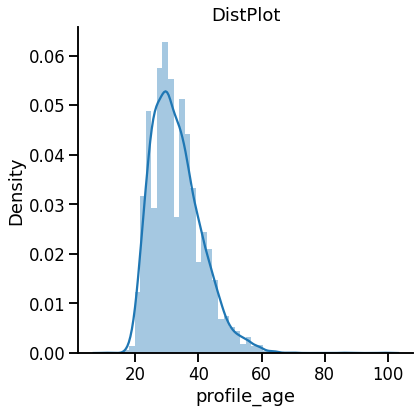

In [61]:
fig = plt.figure(figsize=(6,6))
sns.distplot(df[df.profile_age < 100].profile_age)

plt.title('DistPlot')
sns.despine()



plt.savefig('DistPlot.png', bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

---


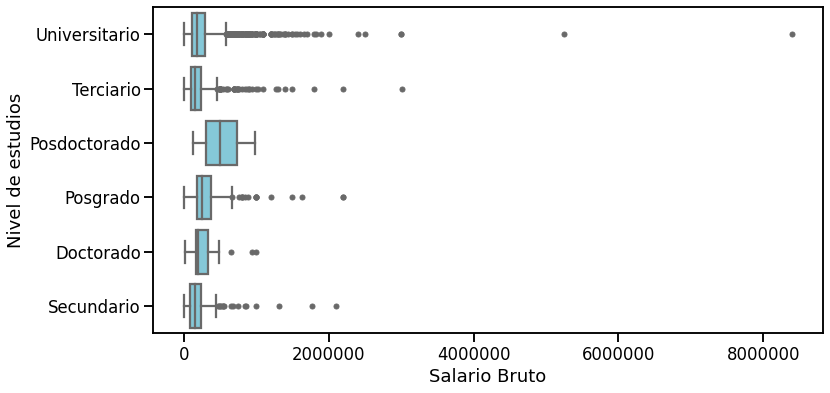

In [62]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(data = df,
                x = salary_col,
                y = 'profile_studies_level',
                color = '#77d1e6',
                flierprops = dict(marker='o')            
               )

plt.ticklabel_format(style = 'plain',
                     axis = 'x'
                    )
plt.xlabel('Salario Bruto')
plt.ylabel('Nivel de estudios')

plt.show()

---
## BoxenPlots

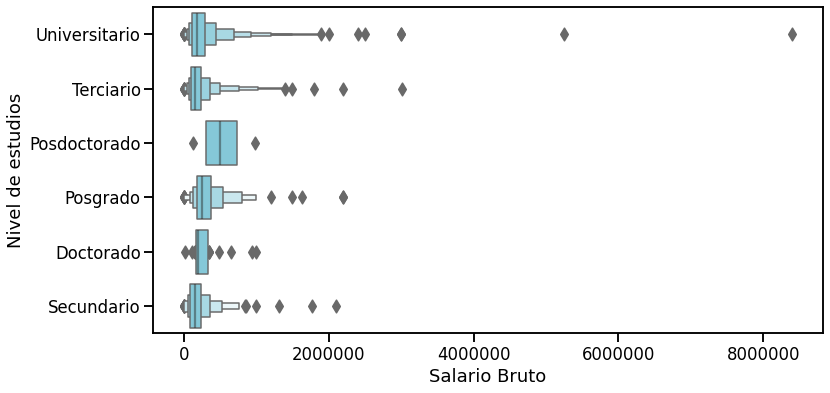

In [63]:
fig = plt.figure(figsize=(12,6))
sns.boxenplot(data = df,
             x = salary_col,
             y = 'profile_studies_level',
             color = '#77d1e6')

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Salario Bruto')
plt.ylabel('Nivel de estudios')

plt.show()

# plt.figure(figsize=(12, 6))
# seaborn.boxenplot(data=df, x=salary_col, y='profile_studies_level',
#                 color='orangered')
# plt.ticklabel_format(style='plain', axis='x')

---
## Eliminacion de valores extremos
### Usando percentiles 

Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.

Por ejemplo, podemos elegir quedarnos con el 99% de salarios más bajos, eliminando el 1%. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [64]:
k = 90
percentile_90 = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_90])
n_above = len(df[df[salary_col] > percentile_90])
print(f'Percentil {k} de la columna {salary_col}: {percentile_90}')

print(f'% de datos menores que percentil {k}: {round(n_below / len(df),2)}')
print(f'% de datos mayores que percentil {k}: {round(n_above / len(df),2)} ')

Percentil 90 de la columna salary_monthly_BRUTO: 500000.0
% de datos menores que percentil 90: 0.9
% de datos mayores que percentil 90: 0.09 


In [65]:
df[salary_col].quantile([.95, .98, .99, .995, .998])

0.950     750000.0
0.980    1100000.0
0.990    1409964.0
0.995    1800000.0
0.998    2274100.0
Name: salary_monthly_BRUTO, dtype: float64

### Usando rangos

I) Basado en percentiles

In [66]:
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

In [67]:
data = clean_outliers_q3(df, salary_col)[salary_col]

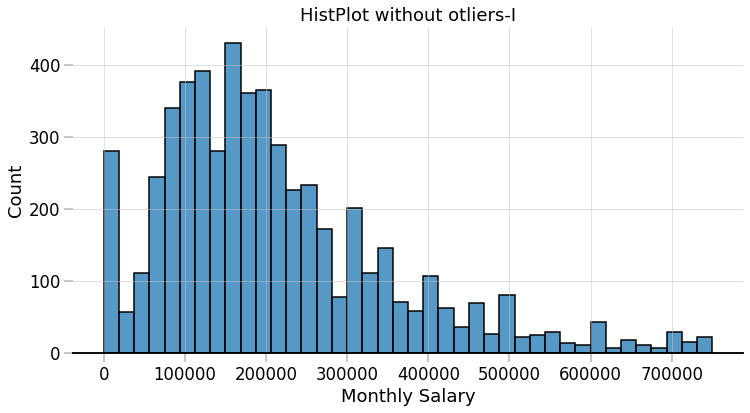

In [68]:
fig = plt.figure(figsize = (12,6))

# definimos el estilo del grafico
sns.histplot(x = data)



# definimos los titulos de la figura y de los ejes
plt.title('HistPlot without otliers-I')
plt.xlabel('Monthly Salary')
plt.ylabel('Count')

# incorporamos una grilla al grafico
plt.grid(color = '#c4c4c4',
         linewidth = 0.5)

# eliminamos las lineas superior y de los costados que delimitan el grafico
sns.despine(top=True, right=True, left=True)

# a los ticks del eje y les ponemos el mismo color que a la grilla
plt.tick_params(color='#c4c4c4')



plt.savefig('HistPlot without otliers-I', bbox_inches='tight', facecolor='white', transparent=False)
plt.show()



II) Basado en desviacion estandar

In [69]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [70]:
data_2 = clean_outliers_sd(df, salary_col)[salary_col]

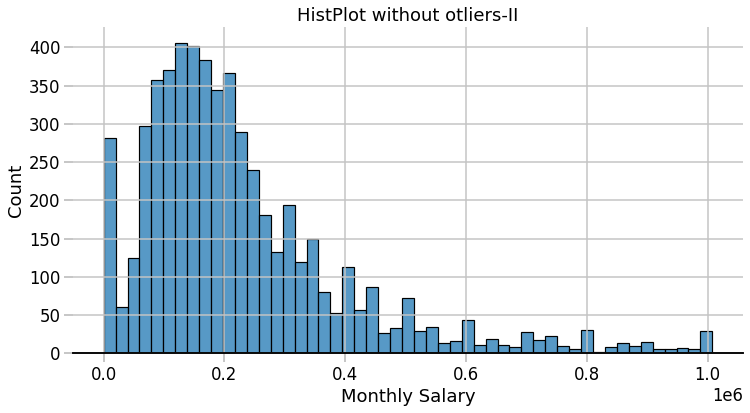

In [71]:
fig_2 = plt.figure(figsize = (12,6))

# definimos el estilo del grafico
sns.histplot(x = data_2)



# definimos los titulos de la figura y de los ejes
plt.title('HistPlot without otliers-II')
plt.xlabel('Monthly Salary')
plt.ylabel('Count')

# incorporamos una grilla al grafico
plt.grid(color = '#c4c4c4')

# eliminamos las lineas superior y de los costados que delimitan el grafico
sns.despine(top=True, right=True, left=True)

# a los ticks del eje y les ponemos el mismo color que a la grilla
plt.tick_params(color='#c4c4c4')



plt.savefig('HistPlot without otliers-II', bbox_inches='tight', facecolor='white', transparent=False)
plt.show()